# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, how="right", on="Mouse ID")

# Display the data table for preview
combined_data = combined_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex",
                               "Age_months", "Weight (g)"]] 
#combined_data.dtypes
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [60]:
# Checking the number of mice.
mice = combined_data["Mouse ID"].value_counts()
number_of_mice = len(mice)
number_of_mice

249

In [61]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [62]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_g989 = combined_data.loc[combined_data["Mouse ID"] == "g989", :]
duplicate_mouse_g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [63]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe = combined_data[combined_data['Mouse ID'] != 'g989']
clean_dataframe.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [64]:
# Checking the number of mice in the clean DataFrame.
mice_no_duplicates = clean_dataframe["Mouse ID"].value_counts()
real_mouse_count = len(mice_no_duplicates)
real_mouse_count


248

## Summary Statistics

In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

drug_regimen_stats_df = clean_dataframe.groupby("Drug Regimen")

drug_mean = drug_regimen_stats_df['Tumor Volume (mm3)'].mean()
drug_median = drug_regimen_stats_df['Tumor Volume (mm3)'].median()
drug_var = drug_regimen_stats_df['Tumor Volume (mm3)'].var()
drug_std = drug_regimen_stats_df['Tumor Volume (mm3)'].std()
drug_sem = drug_regimen_stats_df['Tumor Volume (mm3)'].sem()


# Assemble the resulting series into a single summary dataframe.
summary_stats_df = pd.DataFrame({'Mean Tumor Volume': drug_mean, "Median Tumor Volume": drug_median,
                                'Tumor Volume Variance': drug_var,
                                'Tumor Volume Std. Dev.': drug_std,
                                'Tumor Volume Std. Err.': drug_sem})

#show df
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [66]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggrigated_summary =  clean_dataframe.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
aggrigated_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

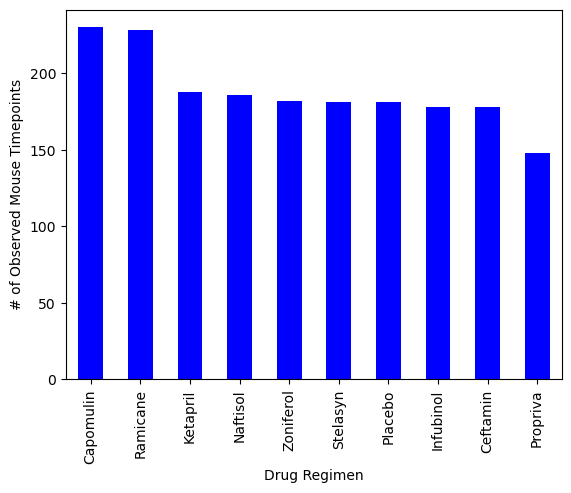

In [67]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_timepoints = clean_dataframe["Drug Regimen"].value_counts()
# mouse_timepoints #show counts

pandas_bar = mouse_timepoints.plot.bar(color="b")

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


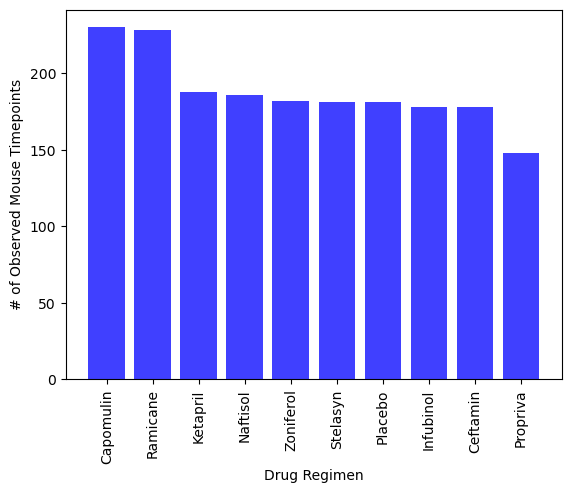

In [68]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mouse_timepoints.index.values
y_axis = mouse_timepoints

plt.bar(x_axis, y_axis, color="blue", alpha=.75, align="center")

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()

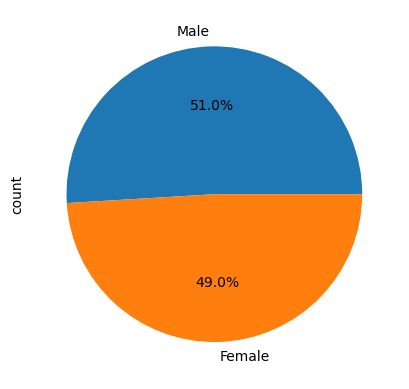

In [69]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mouse_sex = clean_dataframe["Sex"].value_counts()


# Make the pie chart
mouse_sex.plot.pie(autopct="%1.1f%%")

plt.ylabel("count")
plt.show()

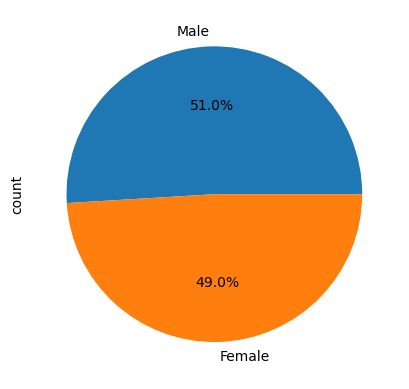

In [70]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
second_mouse_sex = clean_dataframe["Sex"].value_counts()

# Make the pie chart
plt.pie(second_mouse_sex, labels=second_mouse_sex.index.values, autopct="%1.1f%%", startangle=0)
plt.ylabel("count")
plt.show()


## Quartiles, Outliers and Boxplots

In [71]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time_mouse = combined_data.groupby(["Mouse ID"]).max()
reset_mouse = max_time_mouse.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_mouse_time_df = reset_mouse[["Mouse ID", "Timepoint"]].merge(combined_data, on=["Mouse ID", "Timepoint"], how="left")

#merged_mouse_time_df.head()


In [72]:
# Put treatments into a list for for loop (and later for plot labels)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
def outliers(regimen):
    regimen_data = merged_mouse_time_df.loc[merged_mouse_time_df["Drug Regimen"] == regimen]["Tumor Volume (mm3)"]

    quartiles = regimen_data.quantile([0.25,0.5,0.75])
    bottom_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    interquartile_range = upper_quartile - bottom_quartile
    lower_bound = bottom_quartile - (1.5 * interquartile_range)
    upper_bound = upper_quartile + (1.5 * interquartile_range)


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds
    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")
    return regimen_data

# Create empty list to fill with tumor vol data (for plotting)
cap = outliers("Capomulin")
ram = outliers("Ramicane")
inf = outliers("Infubinol")
ceft = outliers("Ceftamin")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

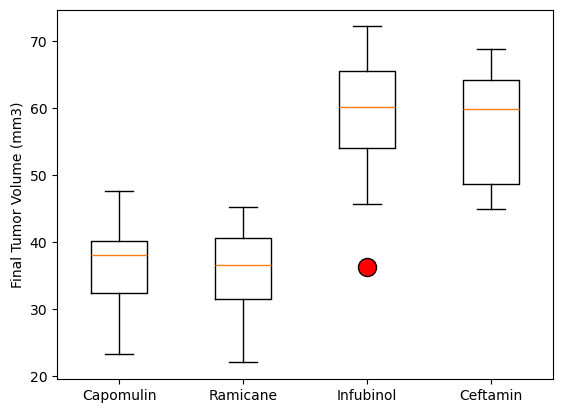

In [73]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
red_dot = dict(markerfacecolor = "red", markersize=13)
plt.boxplot([cap, ram, inf, ceft],labels=["Capomulin","Ramicane","Infubinol","Ceftamin"],flierprops = red_dot)
plt.ylabel("Final Tumor Volume (mm3)")


## Line and Scatter Plots

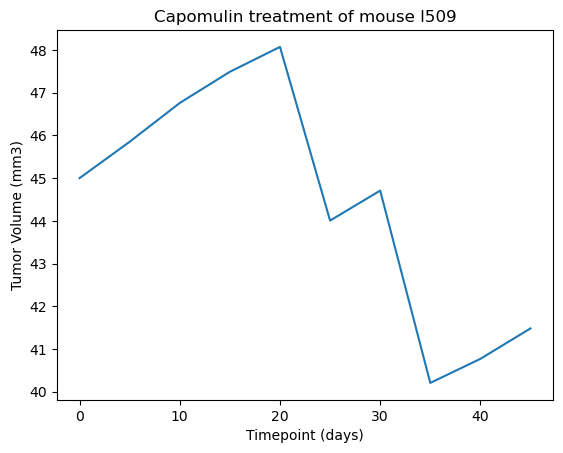

In [74]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_mouse = clean_dataframe.loc[clean_dataframe["Drug Regimen"] == "Capomulin"]

line_cap_mouse = cap_mouse.loc[cap_mouse["Mouse ID"] == "l509"]

plt.plot(line_cap_mouse["Timepoint"], line_cap_mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()


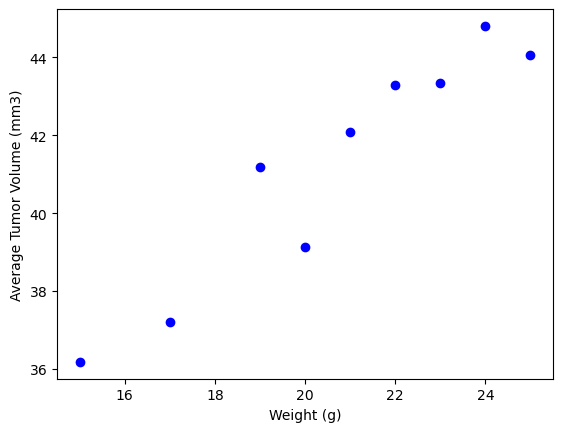

In [82]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


avg_capm_vol = cap_mouse.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()


# make dataframe and confirm values
#avg_capm_df = pd.DataFrame(avg_capm_vol)
#avg_capm_df

plt.scatter(avg_capm_vol.index, avg_capm_vol.values, c="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.95


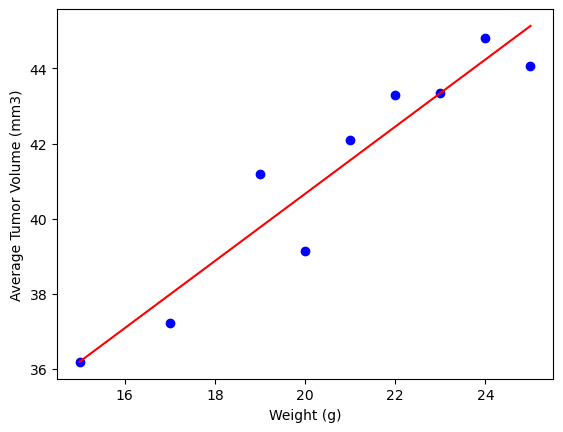

In [89]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = correlation = st.pearsonr(avg_capm_vol.values,avg_capm_vol.index)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x = (avg_capm_vol.index)
y = (avg_capm_vol.values)
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(x,y)
regress_values = avg_capm_vol.index * slope + intercept

plt.plot(avg_capm_vol.index, regress_values, color ="r")


plt.scatter(avg_capm_vol.index, avg_capm_vol.values, c="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()